# Basic plot operations in Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simple 2 variable plots

Setup a couple of simple dataframes

In [3]:
df2 = pd.DataFrame({'X':[0,1,2,3,4,5,6,7,8], 'Y':[0,1,4,9,16,25,36,49,64]})
df3 = pd.DataFrame({'X':[0,1,2,3,4,5,6,7,8], 'Y':[0,1,8,27,64,125,216,343,512]})

### Scatterplot

Make a scatter plot in seaborn, note that most plots in seaborn take a dataframe as an argument and you simply supply the column names you want in the plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

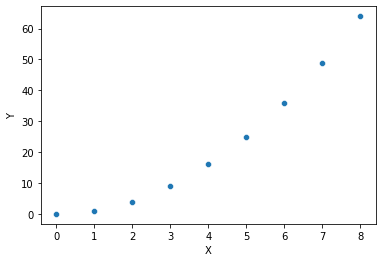

In [4]:
sns.scatterplot(data=df2, x='X', y='Y')

### Line plot

<AxesSubplot:xlabel='X', ylabel='Y'>

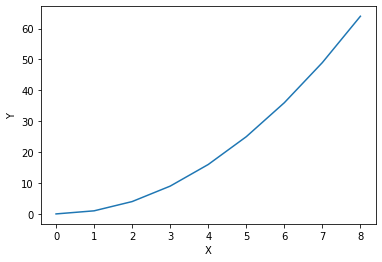

In [5]:
sns.lineplot(data=df2, x='X', y='Y')

### Bar plot

<AxesSubplot:xlabel='X', ylabel='Y'>

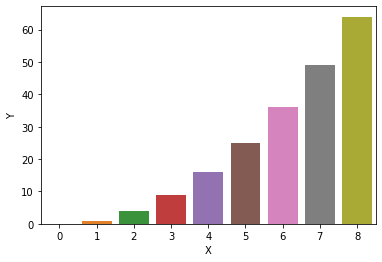

In [6]:
sns.barplot(data=df2, x='X', y='Y')

## Adjusting plot parameters

### Labels and limits

Let's add some labels and adjust the axis limits

Text(0, 0.5, 'Squares')

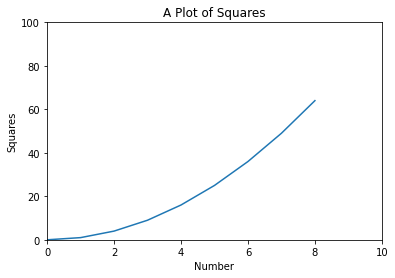

In [7]:
sns.lineplot(data=df2, x='X', y='Y')

plt.xlim([0,10])
plt.ylim([0,100])
plt.title('A Plot of Squares')
plt.xlabel('Number')
plt.ylabel('Squares')

### Figure size

Let's make the figure a bit bigger, in order to do so we have to use matplotlib's figure before our plot call.

<AxesSubplot:xlabel='X', ylabel='Y'>

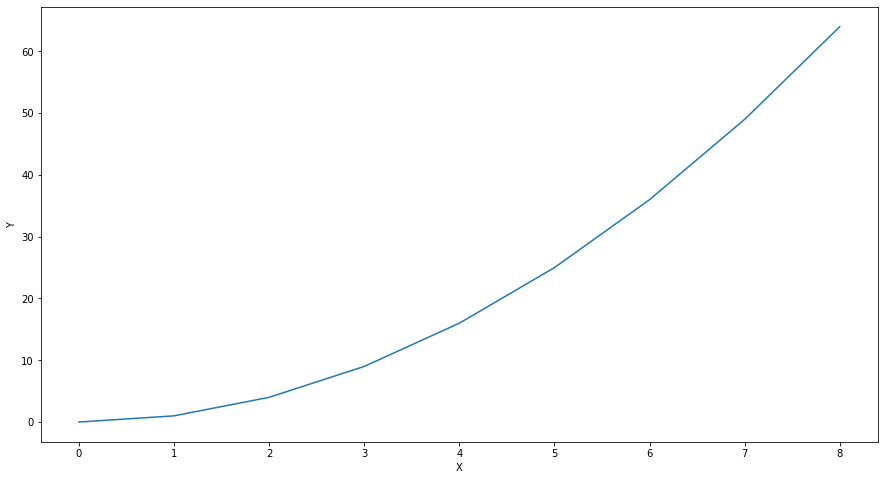

In [8]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df2, x='X', y='Y')

### Overlaying multiple plots

Let's plot two things on top of each other, to do so just call the plotting function twice.  We can use plt.legend to add a figure legend.

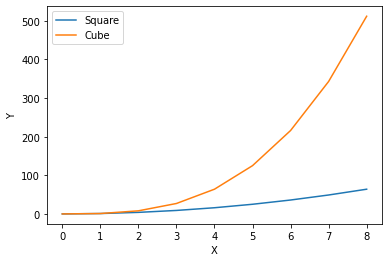

In [9]:
sns.lineplot(data=df2, x='X', y='Y')
sns.lineplot(data=df3, x='X', y='Y')

plt.legend(labels=['Square', 'Cube'])

## Histograms

## Distplot

Let's make a new dataframe with two columns, each having a normal distribution of random values but with different widths/centers.

In [10]:
df=pd.DataFrame({'Norm1':np.random.normal(4,1,1000), 'Norm2':np.random.normal(3,3,1000)})

Use distplot to plot.  Note this plot just takes a list/numpy array/or Series of values, it does not take the full dataframe.

c:\users\seancatjohn\anaconda3\envs\course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\seancatjohn\anaconda3\envs\course\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\seancatjohn\anaconda3\envs\course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:

<AxesSubplot:xlabel='Norm2'>

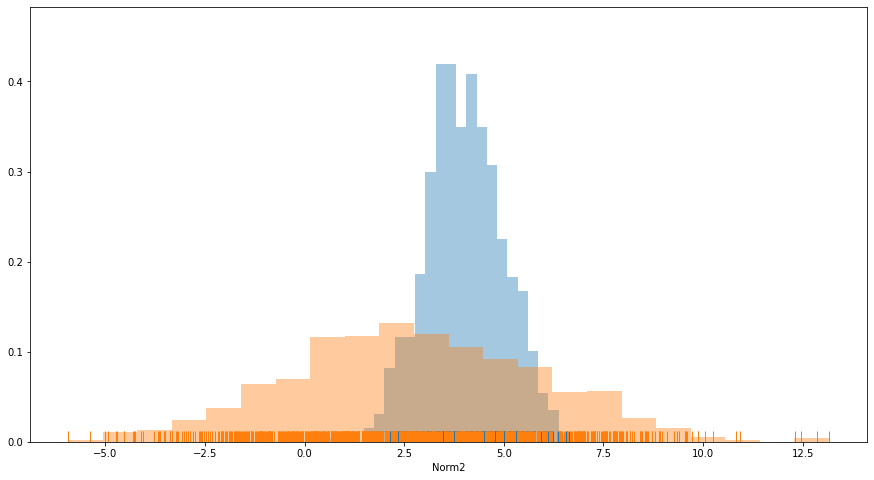

In [11]:
plt.figure(figsize=[15,8])
sns.distplot(df['Norm1'], kde=False, norm_hist=True, rug=True)
sns.distplot(df['Norm2'], kde=False, norm_hist=True, rug=True)



In [12]:
sns.distplot?

## Displot

The last plot shows us the distribution of the two variables, but what about their relationship?  For that we can use displot.

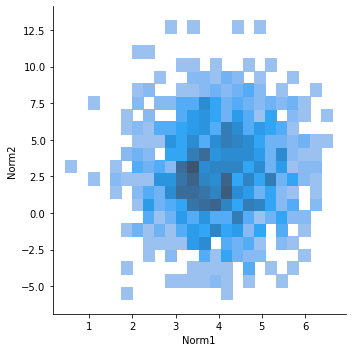

In [13]:
sns.displot(df, x='Norm1', y='Norm2')

For this dataset it is not too interesting, let's put together two separate datasets with different means and standard deviations for our two variables.

In [14]:
df_A = pd.DataFrame({'Norm1':np.random.normal(4,1,1000), 'Norm2':np.random.normal(3,3,1000), 'Type':'A'})
df_B = pd.DataFrame({'Norm1':np.random.normal(2,1,1000), 'Norm2':np.random.normal(5,3,1000), 'Type':'B'})


In [15]:
df_AB = pd.concat([df_A, df_B])

Now when we plot we provide the hue argument to see which distribution it came from.

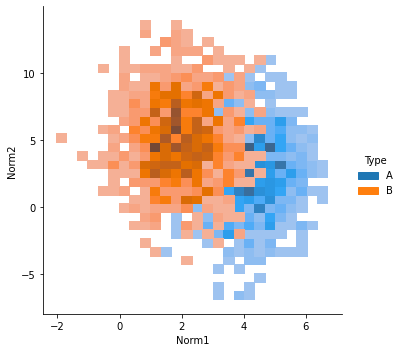

In [16]:
sns.displot(df_AB, x='Norm1', y='Norm2', hue='Type')

Unfortunately this can cover up data, use the "kind" argument helps with clarity

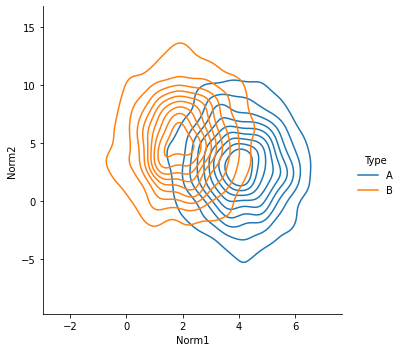

In [17]:
sns.displot(df_AB, x='Norm1', y='Norm2', hue='Type', kind='kde')

## Jointplot

Sometimes it is useful to have the 1D distributions as well, jointplot can do that for us.

<Figure size 1080x576 with 0 Axes>

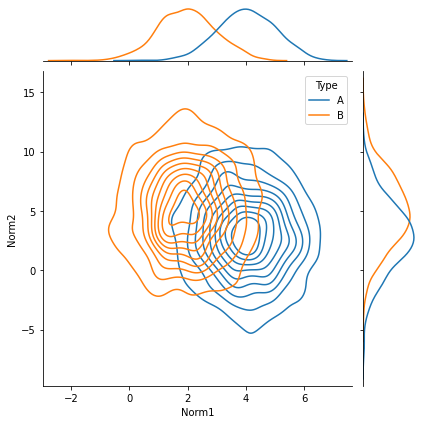

In [18]:
plt.figure(figsize=[15,8])
sns.jointplot(data=df_AB, x='Norm1', y='Norm2', hue='Type', kind='kde')

<Figure size 1080x576 with 0 Axes>

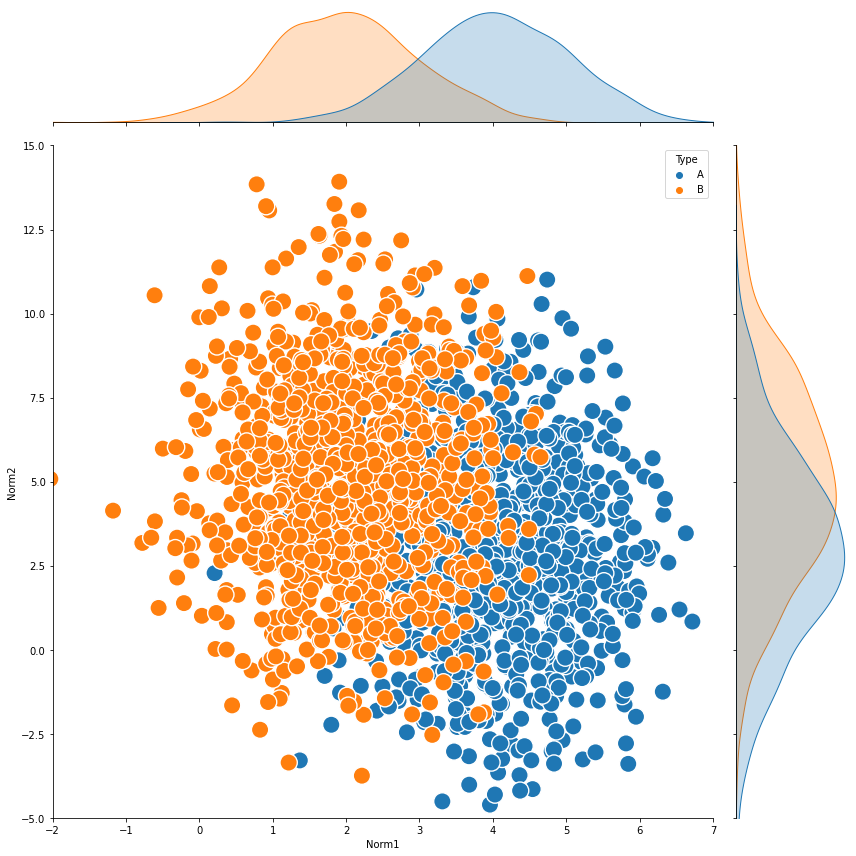

In [23]:
plt.figure(figsize=[15,8])
sns.jointplot(data=df_AB, x='Norm1', y='Norm2', hue='Type', height=12, joint_kws={"s":300}, xlim=[-2,7], ylim=[-5,15])